# 一、基本信息

1. 实验名称：泰坦尼克号乘客数据分析
2. 实验学时：2
3. 实验类别：综合性
4. 课程名称：数据分析基础（Python）
5. 课程编号：12002CC019


# 二、实验目的（预期学习效果）


本实验应符合课程总体学习要求，促进以下预期效果的达成：
* 掌握Pandas中Series与DataFrame的创建、索引操作、DataFrame数据的查询与编辑方法、数据分组与聚合、数据透视表和可视化等知识；
* 能够能够综合应用Pandas统计分析基础知识解决数据分析问题。

涉及主要KT点包括：
* KT12_Pandas中的数据结构
* KT13_Pandas索引操作
* KT14_Pandas中DataFrame数据的查询与编辑
* KT15_Pandas数据运算
* KT16_Pandas数据分组与聚合
* KT17_Pandas数据透视表
* KT18_Pandas可视化


# 三、实验任务及原理

实验任务说明：在20世纪初，由英国白星轮船公司耗资7500万英镑打造的当时世界上最大的豪华客轮“泰坦尼克”号，曾被称作为“永不沉没的船”和“梦幻之船”这艘豪轮在她的处女之航中，就因撞上冰山而在大西洋沉没。百年来，关于“泰坦尼克”号沉没的原因，一直是人们津津乐道的话题。据了解，当时泰坦尼克号上共有乘客 2224 人，而本实验提供的数据集共有 714人，由于是抽样而非全样，分析结果并不是很准确，主要供同学们加强本章学习的知识，提高应用能力。数据文件名称为：Titanic_clean.csv。

要求读取数据文件，对泰坦尼克乘客幸存情况进行分析。

本实验主要应用Pandas统计分析基础知识完成，具体包括：  
（1）Pandas中的数据结构：包括Series和DataFrame，Series类似于一维数组，DataFrame是类似表格的二维数组。  
（2）Pandas索引操作：可以使用reindex方法重建索引，使用set_index方法更换索引。  
（3）DataFrame数据的查询与编辑  
* 数据查询：通过列索引或以属性的方式可以单独获取DataFrame的列数据；通过行索引切片或者行索引位置的切片形式可以选取行数据；通过loc或者iloc方法同时选取行和列；也可以运用布尔运算对数据进行筛选；  
* 数据编辑：增加一行直接通过append方法传入字典结构数据即可；增加列时，只需为要增加的列赋值即可创建一个新的列；删除数据用drop方法；修改数据时直接对选择的数据赋值即可。  

（4）数据运算：Pandas的数据对象在进行算术运算时，如果有相同索引则进行算术运算，如果没有，则会自动进行数据对齐，但会引入缺失值；如果对数据进行较为较复杂的运算，可以定义函数，将函数映射到数据上进行运算；通过sort_index方法或者sort_values方法对数据进行排序；Pandas中提供了常用的数据分析统计方法，如求和、均值、方差、标准差等。  
（5）数据分组与聚合：利用groupby方法，根据索引或字段对数据进行分组，然后利用聚合函数计算各种统计值。  
（6）数据透视表：数据透视表是一种可以对数据动态排布并且分类汇总的表格格式。在pandas中称之作pivot_table；交叉表是一种特殊的透视表，主要用于计算分组频率。  
（7）可视化：可采用线形图、柱状图、直方图、密度图、散点图对数据进行可视化呈现。用plot方法绘制，默认绘制的都是线形图。  


# 四、实验环境

实验仪器设备：计算机。

实验软件：Jupyter Notebook。

工具耗材：无。

# 五、实验预习任务

实验前，应复习本实验涉及的KT点，并完成前次布置的相关练习题目，并阅读相关参考性资料，做好实验前准备。

# 六、实验过程（实验方案）


## **任务1** 数据预处理
对数据进行导入并且进行预处理，为后续的统计分析打下基础。

问题1. 引入包，读取数据，调用info方法查看数据各字段信息，从中分析数据的缺失情况，请写下分析结果

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 使用read_csv()方法读取'data/Titanic_clean.csv'
titanic_df = pd.read_csv('data/Titanic_clean.csv')

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.1+ KB


分析：结合题目要求，应该对数据做哪些处理呢？

问题2. 删除“PassengerId”,“Name”,“Ticket”等分析中不用的数据；Cabin丢失值太多，不能用此数据分析出 Cabin 对生存率的影响,删除

In [2]:
# 删除“PassengerId”,“Name”,“Ticket”
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)
# 删除Cabin
titanic_df.drop("Cabin",axis=1,inplace=True)
#查看数据表基本信息，确认以上处理是否成功
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 44.8+ KB


## **任务2** 数据统计分析及可视化
使用Pandas对数据进行统计分析，并且通过可视化形式进行展示。

问题3. 891人当中，共多少人幸存？


In [3]:
#891人当中，共多少人幸存？
survived_num = titanic_df['Survived'].sum()
death_num = len(titanic_df) - survived_num
print("{0}人幸存，{1}人遇难。" .format(survived_num,death_num))

290人幸存，424人遇难。


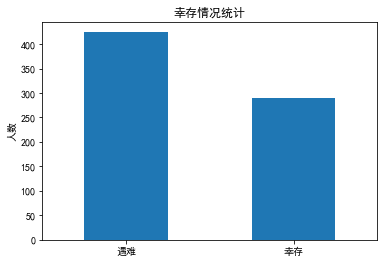

In [4]:
#柱状图
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

Survived = titanic_df['Survived'].value_counts()
Survived.index = ['遇难','幸存']
ax = Survived.plot(kind = 'bar',title = '幸存情况统计',rot=0)  #rot设置轴标签（轴刻度）的显示旋转度数  
ax.set_ylabel('人数')
plt.show()

问题4. 统计分析不同类型客舱乘客幸存情况  
（1）统计不同类型客舱的人数，采用柱状图和饼状图进行可视化；  
（2）制作交叉表，统计不同类型客舱的幸存人数与遇难人数；  
（3）统计不同类型客舱生还人数和占总幸存人数的比例，采用柱状图和饼状图进行可视化;  
（4）不同类型客舱的幸存人数与遇难人数对比，采用堆叠柱状图进行可视化。

In [5]:
# （1）统计不同类型客舱的人数
pclass_df = titanic_df[['Pclass','Survived']].groupby(['Pclass']).count()

pclass_df.rename(columns = {'Survived':'人数'},inplace = True)#修改列名
display(pclass_df)

,人数
Pclass,
1,186
2,173
3,355


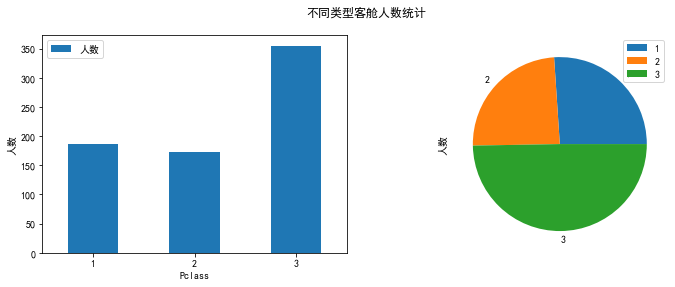

In [6]:
#柱状图
p1 = plt.subplot(121) 
ax = pclass_df.plot(kind='bar',ax = p1,rot = 0,figsize=(12,4))  
ax.set_ylabel('人数')

#饼状图
p2 = plt.subplot(122) 
pclass_df.plot(kind = 'pie',ax = p2,title = '不同类型客舱人数统计',subplots = True,figsize = (12,4)) 

plt.show()

In [7]:
# （2）制作交叉表，统计不同类型客舱的幸存人数与遇难人数； 
survived_pclass_df = pd.crosstab(titanic_df.Pclass,titanic_df.Survived)

#将列名改为中文
survived_pclass_df.rename(columns= {0:'遇难',1:'幸存'},inplace = True)
display(survived_pclass_df)

Survived,遇难,幸存
Pclass,,
1,64,122
2,90,83
3,270,85


In [8]:
# （3）统计不同类型客舱幸存人数和占总幸存人数的比例
survived_df = titanic_df[titanic_df[ 'Survived'] == 1 ]
survived_pclass_df = survived_df[['Pclass','Survived']].groupby(['Pclass']).sum()
survived_pclass_df['Ratio'] = survived_pclass_df / survived_df[ 'Survived'].sum()

#利用map设置'Ratio'的格式为小数点后两位的百分数
survived_pclass_df['Ratio'] = survived_pclass_df['Ratio'].map(lambda x: format(x,'.2%'))
display(survived_pclass_df)

,Survived,Ratio
Pclass,,
1,122,42.07%
2,83,28.62%
3,85,29.31%


,Survived
Pclass,
1,122
2,83
3,85


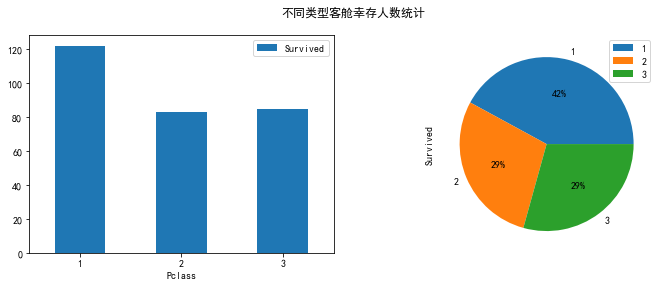

In [9]:
# 删除survived_pclass_df的“Ratio”列
survived_pclass_df = survived_pclass_df.drop(['Ratio'], axis = 1)

display(survived_pclass_df)

# 柱状图
p1 = plt.subplot(121) 
survived_pclass_df.plot(kind = 'bar',ax = p1,rot = 0,figsize = (12,4))  

#饼状图
p2 = plt.subplot(122) 
survived_pclass_df.plot(kind = 'pie',ax = p2,title = '不同类型客舱幸存人数统计',autopct='%1.0f%%',
                             subplots = True, figsize = (8,4))   
plt.show()

Survived,遇难,幸存
Pclass,,
1,64,122
2,90,83
3,270,85


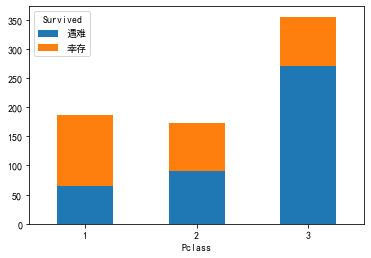

In [10]:
# （4）不同类型客舱的幸存人数与遇难人数对比
survived_pclass_df = pd.crosstab(titanic_df.Pclass,titanic_df.Survived)

survived_pclass_df.rename(columns= {0:'遇难',1:'幸存'},inplace = True)
display(survived_pclass_df)

# 堆积柱状图
survived_pclass_df.plot(kind = 'bar', stacked = True, rot = 0)
plt.show()

问题5. 统计分析不同年龄段乘客幸存情况：  
（1）利用直方图和箱图显示船上乘客年龄分布情况；   
（2）查看“Age”的描述性统计信息；  
（3）按照年龄，将乘客划分为儿童、少年、成年人和老年人，分析四个群体幸存情况。  
* 年龄分段："小于12岁","13-17岁","18-64岁","大于65岁"  
* 统计各年龄段遇难和幸存人数  
* 利用堆积柱状图显示各年龄段遇难人数

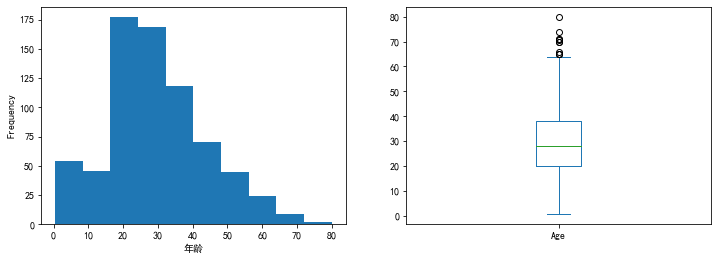

In [11]:
# （1）采用直方图和箱图显示船上乘客年龄分布情况
#绘制直方图
p1 = plt.subplot(121)
ax = titanic_df['Age'].plot(kind = 'hist',ax = p1,rot = 0,figsize = (12,4)) # bins = 70
ax.set_xlabel('年龄')
#绘制箱图
p2 = plt.subplot(122)
ax = titanic_df['Age'].plot(kind = 'box',ax = p2,figsize = (12,4)) 
plt.show()

In [12]:
# （2）查看“Age”的描述性统计信息
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
# （3）按照年龄，将乘客划分为儿童、少年、成年人和老年人，分析四个群体生还情况
# 按照"小于12岁","13~17岁","18~64岁","大于65岁" 划分为4个数据集 
children_df = titanic_df[ titanic_df['Age'] <= 12]
juvenile_df = titanic_df[(titanic_df['Age'] > 12) & (titanic_df['Age'] < 18)]
adults_df = titanic_df[(titanic_df['Age'] >= 18) & (titanic_df['Age'] < 65)]
agedness_df = titanic_df[titanic_df['Age'] >= 65]

# 统计各年龄段遇难和幸存人数
c = children_df['Survived'].value_counts()
j = juvenile_df['Survived'].value_counts()
a = adults_df['Survived'].value_counts()
an = agedness_df['Survived'].value_counts()

print("遇难人数统计：")
print("小于12岁 {0}人\tt13~17岁 {1}人\t18~64岁 {2}人\t大于65岁 {3}人".format(c[0], j[0],a[0],an[0]))
print("幸存人数统计：")
print("小于12岁 {0}人\t13~17岁 {1}人\t18~64岁 {2}人\t大于65岁 {3}人".format(c[1], j[1],a[1],an[1]))

遇难人数统计：
小于12岁 29人	t13~17岁 23人	18~64岁 362人	大于65岁 10人
幸存人数统计：
小于12岁 40人	13~17岁 21人	18~64岁 228人	大于65岁 1人


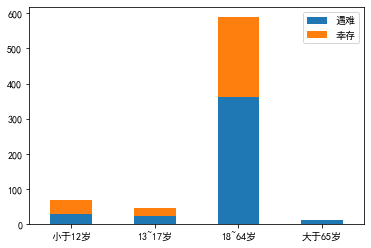

In [14]:
# 堆积柱状图，显示各年龄段遇难人数
age_df = pd.DataFrame({'遇难':[c[0],j[0],a[0],an[0]],'幸存':[c[1],j[1],a[1],an[1]]})
age_df.index=["小于12岁","13~17岁","18~64岁","大于65岁"]
age_df.plot(kind = 'bar', stacked = True, rot = 0)
plt.show()

## 拓展

问题6. 模仿不同类型客舱幸存情况分析，分析性别“Sex”幸存情况


# 七、实验课后任务

学生应当完成本次实验涉及相关任务，完成本次Jupyter Notebook实验报告以后，应将本实验报告文件（.ipynb）按照授课教师指定方式进行上传。


# 八、实验考核

实验满分100分，共2个任务，6个问题，其中拓展问题1个，问题1-问题5每个20分，并且根据问题6完成情况进行酌情加分。按照学生完成问题的程度、代码运行结果、分析结果等质量标准酌情给出对应分数。

# 九、实验资源
本实验提供实验用数据文件： 
* Titanic_clean.csv